# 1.- Importar librerias

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree

plt.style.use('fivethirtyeight')
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

%matplotlib notebook

# 2.- Importar dataset

In [2]:
df_features = pd.read_csv("Features data set.csv", parse_dates=["Date"])
df_sales = pd.read_csv("sales data-set.csv", parse_dates=["Date"])
df_prediction = pd.read_csv("Tabla_1.csv", parse_dates=["Date"])

# 3.- Limpiar y procesar

In [3]:
df_sales.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False

In [4]:
df_sales.Date.value_counts()

2011-12-23    3027
2011-11-25    3021
2011-12-16    3013
2011-09-12    3010
2012-02-17    3007
              ... 
2010-09-07    2903
2010-07-16    2901
2010-08-20    2901
2010-08-27    2898
2010-08-13    2896
Name: Date, Length: 143, dtype: int64

In [5]:
df_features.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        42.31       2.572        NaN        NaN        NaN   
1      1 2010-12-02        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-05-03        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [6]:
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
df_features[df_features.CPI.isna()]

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
169       1 2013-03-05        66.66       3.386    2298.63       2.00   
170       1 2013-10-05        63.90       3.392    4624.61      83.88   
171       1 2013-05-17        69.53       3.454   16170.50      92.00   
172       1 2013-05-24        77.19       3.494    7959.89     178.00   
173       1 2013-05-31        78.02       3.466    2369.77     142.45   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-05-07        77.50       3.614    9090.48    2268.58   
8187     45 2013-12-07        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment  IsHoliday  
169      129.90      55.46    1301.04  NaN           NaN      False  
170       42.38    1618.31    8144.90  NaN           NaN      False  
171        8.32    4127.24    6206.97  NaN           NaN      False  
172     1621.47    3152.57    2938.70  NaN           NaN      False  
173      475.35      45.55    2056.84  NaN           NaN      False  
...         ...        ...        ...  ...           ...        ...  
8185       3.00    2449.97    3169.69  NaN           NaN      False  
8186     582.74    5797.47    1514.93  NaN           NaN      False  
8187      85.72     744.84    2150.36  NaN           NaN      False  
8188     204.19     363.00    1059.46  NaN           NaN      False  
8189       2.06      10.88    1864.57  NaN           NaN      False  

[585 rows x 12 columns]

 Al verificar las columnas markdown no es produnte impurtar los valores, ya que tiene muchos valores perdidos. Teniendo en cuenta que falta alrededor del 5% de CPI y de desempleo, y de markdown de un 70. En lo cual se remplazara por valores lineal para la col CPI e Unemployement.

In [8]:
df_features.head(10)

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        42.31       2.572        NaN        NaN        NaN   
1      1 2010-12-02        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-05-03        46.50       2.625        NaN        NaN        NaN   
5      1 2010-12-03        57.79       2.667        NaN        NaN        NaN   
6      1 2010-03-19        54.58       2.720        NaN        NaN        NaN   
7      1 2010-03-26        51.45       2.732        NaN        NaN        NaN   
8      1 2010-02-04        62.27       2.719        NaN        NaN        NaN   
9      1 2010-09-04        65.86       2.770        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False  
5        NaN        NaN  211.380643         8.106      False  
6        NaN        NaN  211.215635         8.106      False  
7        NaN        NaN  211.018042         8.106      False  
8        NaN        NaN  210.820450         7.808      False  
9        NaN        NaN  210.622857         7.808      False

In [9]:
# Imputar columnas
df_features['CPI'] = df_features['CPI'].interpolate(method='linear')
df_features['Unemployment'] = df_features['Unemployment'].interpolate(method='linear')

df_features['MarkDown1'] = IterativeImputer(random_state=0).fit_transform(df_features['MarkDown1'].values.reshape(-1, 1))
df_features['MarkDown2'] = IterativeImputer(random_state=0).fit_transform(df_features['MarkDown1'].values.reshape(-1, 1))
df_features['MarkDown3'] = IterativeImputer(random_state=0).fit_transform(df_features['MarkDown1'].values.reshape(-1, 1))
df_features['MarkDown4'] = IterativeImputer(random_state=0).fit_transform(df_features['MarkDown1'].values.reshape(-1, 1))
df_features['MarkDown5'] = IterativeImputer(random_state=0).fit_transform(df_features['MarkDown1'].values.reshape(-1, 1))

df_features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [10]:
# Se realiza la union por el id store, date y isholiday
df=pd.merge(df_sales,df_features, on=['Store','Date', 'IsHoliday'], how='left')

In [11]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        42.31       2.572   
1      1     1 2010-12-02      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-05-03      21827.90      False        46.50       2.625   

     MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5  \
0  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
1  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
2  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
3  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
4  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [12]:
# df estructura
df.shape

(421570, 14)

In [13]:
# verificar el total de ventas depues de realizar el join
df["Weekly_Sales"].sum()

6737218987.11

In [14]:
# ordernar dataframer en base a la fecha de venta
df = df.sort_values("Date")
df_prediction = df_prediction.sort_values("Date")

In [15]:
df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        3.361027    7108.878720    7108.878720    7108.878720   
std         0.458515    4957.982138    4957.982138    4957.982138   
min         2.472000       0.270000       0.270000       0.270000   
25%         2.933000    7032.371786    7032.371786    7032.371786   
50%         3.452000    7032.371786    7032.371786    7032.371786   
75%         3.738000    7032.371786    7032.371786    7032.371786   
max         4.468000   88646.760000   88646.760000   88646.760000   

           MarkDown4      MarkDown5            CPI   Unemployment  
count  421570.000000  421570.000000  421570.000000  421570.000000  
mean     7108.878720    7108.878720     171.201947       7.960289  
std      4957.982138    4957.982138      39.159276       1.863296  
min         0.270000       0.270000     126.064000       3.879000  
25%      7032.371786    7032.371786     132.022667       6.891000  
50%      7032.371786    7032.371786     182.318780       7.866000  
75%      7032.371786    7032.371786     212.416993       8.572000  
max     88646.760000   88646.760000     227.232807      14.313000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 320135 to 176333
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(10), int64(2)
memory usa

In [17]:
# Separar fechas y agregar columnas [d-m-y]
df["YYYY"] = df["Date"].dt.year
df["MM"] = df["Date"].dt.month
df["DD"] = df["Date"].dt.dayofyear

# limpiar estructura de tabla 1 para ser usada en la predicción de los datos
df_prediction["YYYY"] = df_prediction["Date"].dt.year
df_prediction["MM"] = df_prediction["Date"].dt.month
df_prediction["DD"] = df_prediction["Date"].dt.dayofyear

df_prediction.drop('IsHoliday_y', axis=1, inplace=True)
df_prediction.drop('Unnamed: 0', axis=1, inplace=True)
df_prediction.columns = ["Store","Dept", "Date", "Weekly_Sales", "IsHoliday","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment", "YYYY", "MM", "DD"]

In [18]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
320135     33    96 2010-01-10       7854.09      False        91.45   
166671     17    93 2010-01-10       3533.76      False        60.07   
292156     30    85 2010-01-10         43.92      False        70.28   
292297     30    87 2010-01-10        119.80      False        70.28   
84936       9    55 2010-01-10       6795.58      False        69.08   

        Fuel_Price    MarkDown1    MarkDown2    MarkDown3    MarkDown4  \
320135       3.001  7032.371786  7032.371786  7032.371786  7032.371786   
166671       2.853  7032.371786  7032.371786  7032.371786  7032.371786   
292156       2.603  7032.371786  7032.371786  7032.371786  7032.371786   
292297       2.603  7032.371786  7032.371786  7032.371786  7032.371786   
84936        2.603  7032.371786  7032.371786  7032.371786  7032.371786   

          MarkDown5         CPI  Unemployment  YYYY  MM  DD  
320135  7032.371786  126.234600         9.265  2010   1  10  
166671  7032.371786  126.234600         6.885  2010   1  10  
292156  7032.371786  211.329874         8.163  2010   1  10  
292297  7032.371786  211.329874         8.163  2010   1  10  
84936   7032.371786  215.214134         6.560  2010   1  10

In [19]:
# Pasar valores bool a int
df['IsHoliday'] = df['IsHoliday'].astype(int)
df_prediction['IsHoliday'] = df_prediction['IsHoliday'].astype(int)

In [20]:
# index columan Date
df = df.set_index("Date")
df_pre = df_prediction.set_index("Date")

#  5.- Dividir data set entre training  y testing

In [21]:
 df.head()

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Date                                                                        
2010-01-10     33    96       7854.09          0        91.45       3.001   
2010-01-10     17    93       3533.76          0        60.07       2.853   
2010-01-10     30    85         43.92          0        70.28       2.603   
2010-01-10     30    87        119.80          0        70.28       2.603   
2010-01-10      9    55       6795.58          0        69.08       2.603   

              MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5  \
Date                                                                          
2010-01-10  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
2010-01-10  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
2010-01-10  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
2010-01-10  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   
2010-01-10  7032.371786  7032.371786  7032.371786  7032.371786  7032.371786   

                   CPI  Unemployment  YYYY  MM  DD  
Date                                                
2010-01-10  126.234600         9.265  2010   1  10  
2010-01-10  126.234600         6.885  2010   1  10  
2010-01-10  211.329874         8.163  2010   1  10  
2010-01-10  211.329874         8.163  2010   1  10  
2010-01-10  215.214134         6.560  2010   1  10

set para entrenar desde 2010 al 2021 y para predecir el set 2021 a 2013 

In [22]:
# ejemplo
# training_set_df = df[:'2012-01-01']
# prediction_set_df = df['2012-01-01':]

training_set_df = df

#X_training = training_set_df.drop(columns=['Weekly_Sales', 'YYYY', 'MM', 'DD']).values
#y_training = training_set_df['Weekly_Sales'].values
#X_prediction = prediction_set_df.drop(columns=['Weekly_Sales', 'YYYY', 'MM', 'DD']).values
#y_prediction = prediction_set_df['Weekly_Sales'].values

X_training = training_set_df.drop(columns=['Store', 'YYYY', 'MM', 'DD']).values
y_training = training_set_df['Store'].values
X_prediction = df_pre.drop(columns=['Store', 'YYYY', 'MM', 'DD']).values
y_prediction = df_pre['Store'].values

X_training

array([[9.60000000e+01, 7.85409000e+03, 0.00000000e+00, ...,
        7.03237179e+03, 1.26234600e+02, 9.26500000e+00],
       [9.30000000e+01, 3.53376000e+03, 0.00000000e+00, ...,
        7.03237179e+03, 1.26234600e+02, 6.88500000e+00],
       [8.50000000e+01, 4.39200000e+01, 0.00000000e+00, ...,
        7.03237179e+03, 2.11329874e+02, 8.16300000e+00],
       ...,
       [7.00000000e+00, 2.79831200e+04, 0.00000000e+00, ...,
        2.37450000e+03, 1.38911700e+02, 7.99200000e+00],
       [9.50000000e+01, 1.45394360e+05, 0.00000000e+00, ...,
        2.14550000e+03, 2.23015426e+02, 6.17000000e+00],
       [9.10000000e+01, 2.62758500e+04, 0.00000000e+00, ...,
        2.24119000e+03, 1.38911700e+02, 8.24300000e+00]])

In [23]:
x = StandardScaler().fit_transform(X_training)
x

array([[ 1.69682711, -0.35784915, -0.27510614, ..., -0.01543108,
        -1.14832053,  0.70021769],
       [ 1.59844071, -0.54807857, -0.27510614, ..., -0.01543108,
        -1.14832053, -0.57709025],
       [ 1.33607696, -0.70174049, -0.27510614, ..., -0.01543108,
         1.02473742,  0.10879192],
       ...,
       [-1.22196955,  0.52845666, -0.27510614, ..., -0.95490145,
        -0.82458842,  0.01701895],
       [ 1.66403164,  5.69821715, -0.27510614, ..., -1.00108965,
         1.32314861, -0.96081931],
       [ 1.53284977,  0.45328347, -0.27510614, ..., -0.98178944,
        -0.82458842,  0.15172664]])

In [24]:
X_training.shape, y_training.shape, X_prediction.shape, y_prediction.shape

((421570, 12), (421570,), (50, 12), (50,))

In [25]:
# Seleccionar aleatoriamente el 67 % training  y 33 %
X_train, X_test, y_train, y_test = train_test_split(x, y_training, test_size=0.33, random_state=0)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((282451, 12), (282451,), (139119, 12), (139119,))

# 6.- Modelo KNN

### Probando modelo I K=1

In [27]:
clf = KNeighborsClassifier(n_neighbors=1, weights='distance',algorithm='kd_tree')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1, weights='distance')

In [28]:
# entrega la predicción sobre el testeo
y_pred = clf.predict(X_test)

In [29]:
print('Accuracy con k=1 : %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy con k=1 : 80.000 %


Al probar el modelo con n_neighbors = 1, se visualiza una mayor influencia en el resultado, ya que al aumentar este valor su porcentaje de aceptación va reduciendo  y se tendra un mayor consumo como se puede visualizar en la busqueda de k.

### Probando modelo 2 K=3

In [30]:
clf2 = KNeighborsClassifier(n_neighbors=3, weights='uniform',algorithm='kd_tree')
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [31]:
# entrega la predicción sobre el testeo
y_pred = clf2.predict(X_test)

In [32]:
print('Accuracy con k=3 : %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy con k=3 : 77.131 %


### Probando modelo 3 K=10

In [33]:
clf3 = KNeighborsClassifier(n_neighbors=10, weights='uniform',algorithm='ball_tree')
clf3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

In [34]:
# entrega la predicción sobre el testeo
y_pred = clf3.predict(X_test)

In [35]:
print('Accuracy con k=10 : %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy con k=10 : 73.575 %


### Predicción datos tabla 1 con la configuración mejor

In [36]:
x_pre = StandardScaler().fit_transform(X_prediction)
x_pre

array([[ 1.40059239,  1.87163655, -0.14285714, -0.02759715, -1.83675631,
         1.13217898,  0.56392705, -0.59585063, -0.76075442, -1.65566363,
         1.03033032,  0.2732565 ],
       [-0.97726652,  1.32166377, -0.14285714, -0.49436996, -1.80484325,
        -1.04485974,  0.48628251,  0.2550369 , -0.16234749,  0.44830932,
         1.00267819,  0.39026323],
       [ 0.86473686, -0.40394082, -0.14285714,  1.38282331, -1.63729967,
        -0.78531562,  0.65844599,  0.46061069, -1.38469716,  0.17520357,
         1.01064544,  0.21017461],
       [ 1.90295694, -0.79231793, -0.14285714,  1.33302107, -1.677191  ,
        -0.70728513, -1.38964925, -0.30314735, -0.1769264 ,  0.42309813,
         1.10156731, -0.22580264],
       [-0.44141099, -0.66284348, -0.14285714,  0.62381044, -0.70650202,
         0.29500841,  1.53921947,  0.08489527, -0.1671979 ,  1.03587928,
        -1.12496255,  0.8837264 ],
       [ 1.86946597,  0.73549828, -0.14285714, -1.49765685, -1.20381391,
         0.50411391,  

In [37]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(x_pre, y_prediction, test_size=0.33, random_state=0)

In [38]:
clf = KNeighborsClassifier(n_neighbors=1, weights='distance',algorithm='kd_tree')
clf.fit(X_train_pre, y_train_pre)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1, weights='distance')

In [39]:
# entrega la predicción sobre el testeo
y_pred = clf.predict(X_test_pre)

In [40]:
print('Accuracy con k=10 : %.3f' % (metrics.accuracy_score(y_test_pre, y_pred)*100),'%')

Accuracy con k=10 : 11.765 %


Al aplicar el modelo I (mejor modelo), con el set de datos de tabla I. Se puede visualizar que la configuración no es aplicable para el mejor modelo y su accuracy disminuye

## Buscar el mejor K

<IPython.core.display.Javascript object>


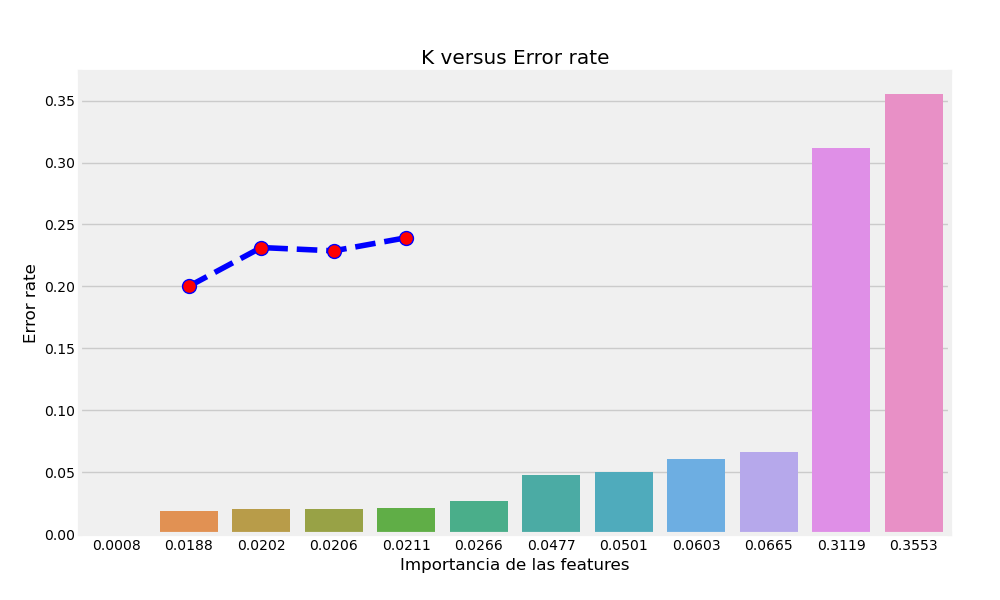

Text(0, 0.5, 'Error rate')

In [41]:
error_rate = []

for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 5), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In [42]:
# buscar el mejor k donde la variable err en su valor minimo
k_optimo = np.where(error_rate==np.min(error_rate))[0][0]+1
print('Mejor k =',k_optimo)

Mejor k = 1


In [43]:
# error medio del modelo I
best_classifier = KNeighborsClassifier(n_neighbors=k_optimo, weights='distance',algorithm='kd_tree')
best_classifier.fit(X_train, y_train)
y_best_pred = best_classifier.predict(X_test)
print('Menor error medio con k=%i : %.3f' % (k_optimo,np.mean(y_best_pred != y_test)*100),'%')

Menor error medio con k=1 : 20.000 %


In [44]:
# k optimo en base al nuevo modelo supervisado Accuracy 
print('Accuracy con k=%i : %.3f' % (k_optimo,metrics.accuracy_score(y_test, y_best_pred)*100),'%')

Accuracy con k=1 : 80.000 %


# 7.- Modelo Forest

### Probando modelo 1 n=50

In [45]:
clf = RandomForestClassifier(n_estimators=50, max_depth=100, min_samples_leaf=150, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=150, n_estimators=50,
                       random_state=0)

In [46]:
clf.score(X_test, y_test)

0.8270761003169949

In [47]:
y_pred = clf.predict(X_test)

In [48]:
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy: 82.708 %


Al visualizar la predicción con el modelo I, se puede visualizar su acertación del modelo equivale casi al 82%. En que se puede considerar un bueno clasificador. 

### Probando modelo 2 n=10

In [49]:
clf2 = RandomForestClassifier(n_estimators=10, max_depth=100, min_samples_leaf=100, random_state=0)
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=100, n_estimators=10,
                       random_state=0)

In [50]:
clf2.score(X_test, y_test)

0.844349082440213

In [51]:
y_pred = clf2.predict(X_test)

In [52]:
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy: 84.435 %


### Probando modelo 3 n=10

In [53]:
clf3 = RandomForestClassifier(n_estimators=10)
clf3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [54]:
clf3.score(X_test, y_test)

0.9338264363602383

In [55]:
y_pred = clf3.predict(X_test)

In [56]:
# Modelo mas optimo
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy: 93.383 %


In [57]:
clf = RandomForestRegressor(n_estimators=50, max_depth=100, min_samples_leaf=150, random_state=0)
clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, min_samples_leaf=150, n_estimators=50,
                      random_state=0)

## Ver importancia

In [58]:
featI = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featI)

10    0.355348
11    0.311908
1     0.066506
0     0.060338
4     0.050095
3     0.047653
5     0.026610
7     0.021070
9     0.020585
6     0.020236
8     0.018815
2     0.000836
dtype: float64


In [59]:
# importancia del feature
sn.barplot(x=round(featI,4), y=featI)
plt.xlabel('Importancia de las features')

Text(0.5, 41.583333333333314, 'Importancia de las features')

In [60]:
# etiquetas
#fn = ["Store","Dept","IsHoliday","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment"]
fn = ["Dept","Weekly_Sales","IsHoliday","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment"]
cn = ['buildingwindowsfloatprocessed','buildingwindowsnonfloatprocessed','vehiclewindowsfloatprocessed','containers','tableware','headlamps']
cn

['buildingwindowsfloatprocessed',
 'buildingwindowsnonfloatprocessed',
 'vehiclewindowsfloatprocessed',
 'containers',
 'tableware',
 'headlamps']

<IPython.core.display.Javascript object>


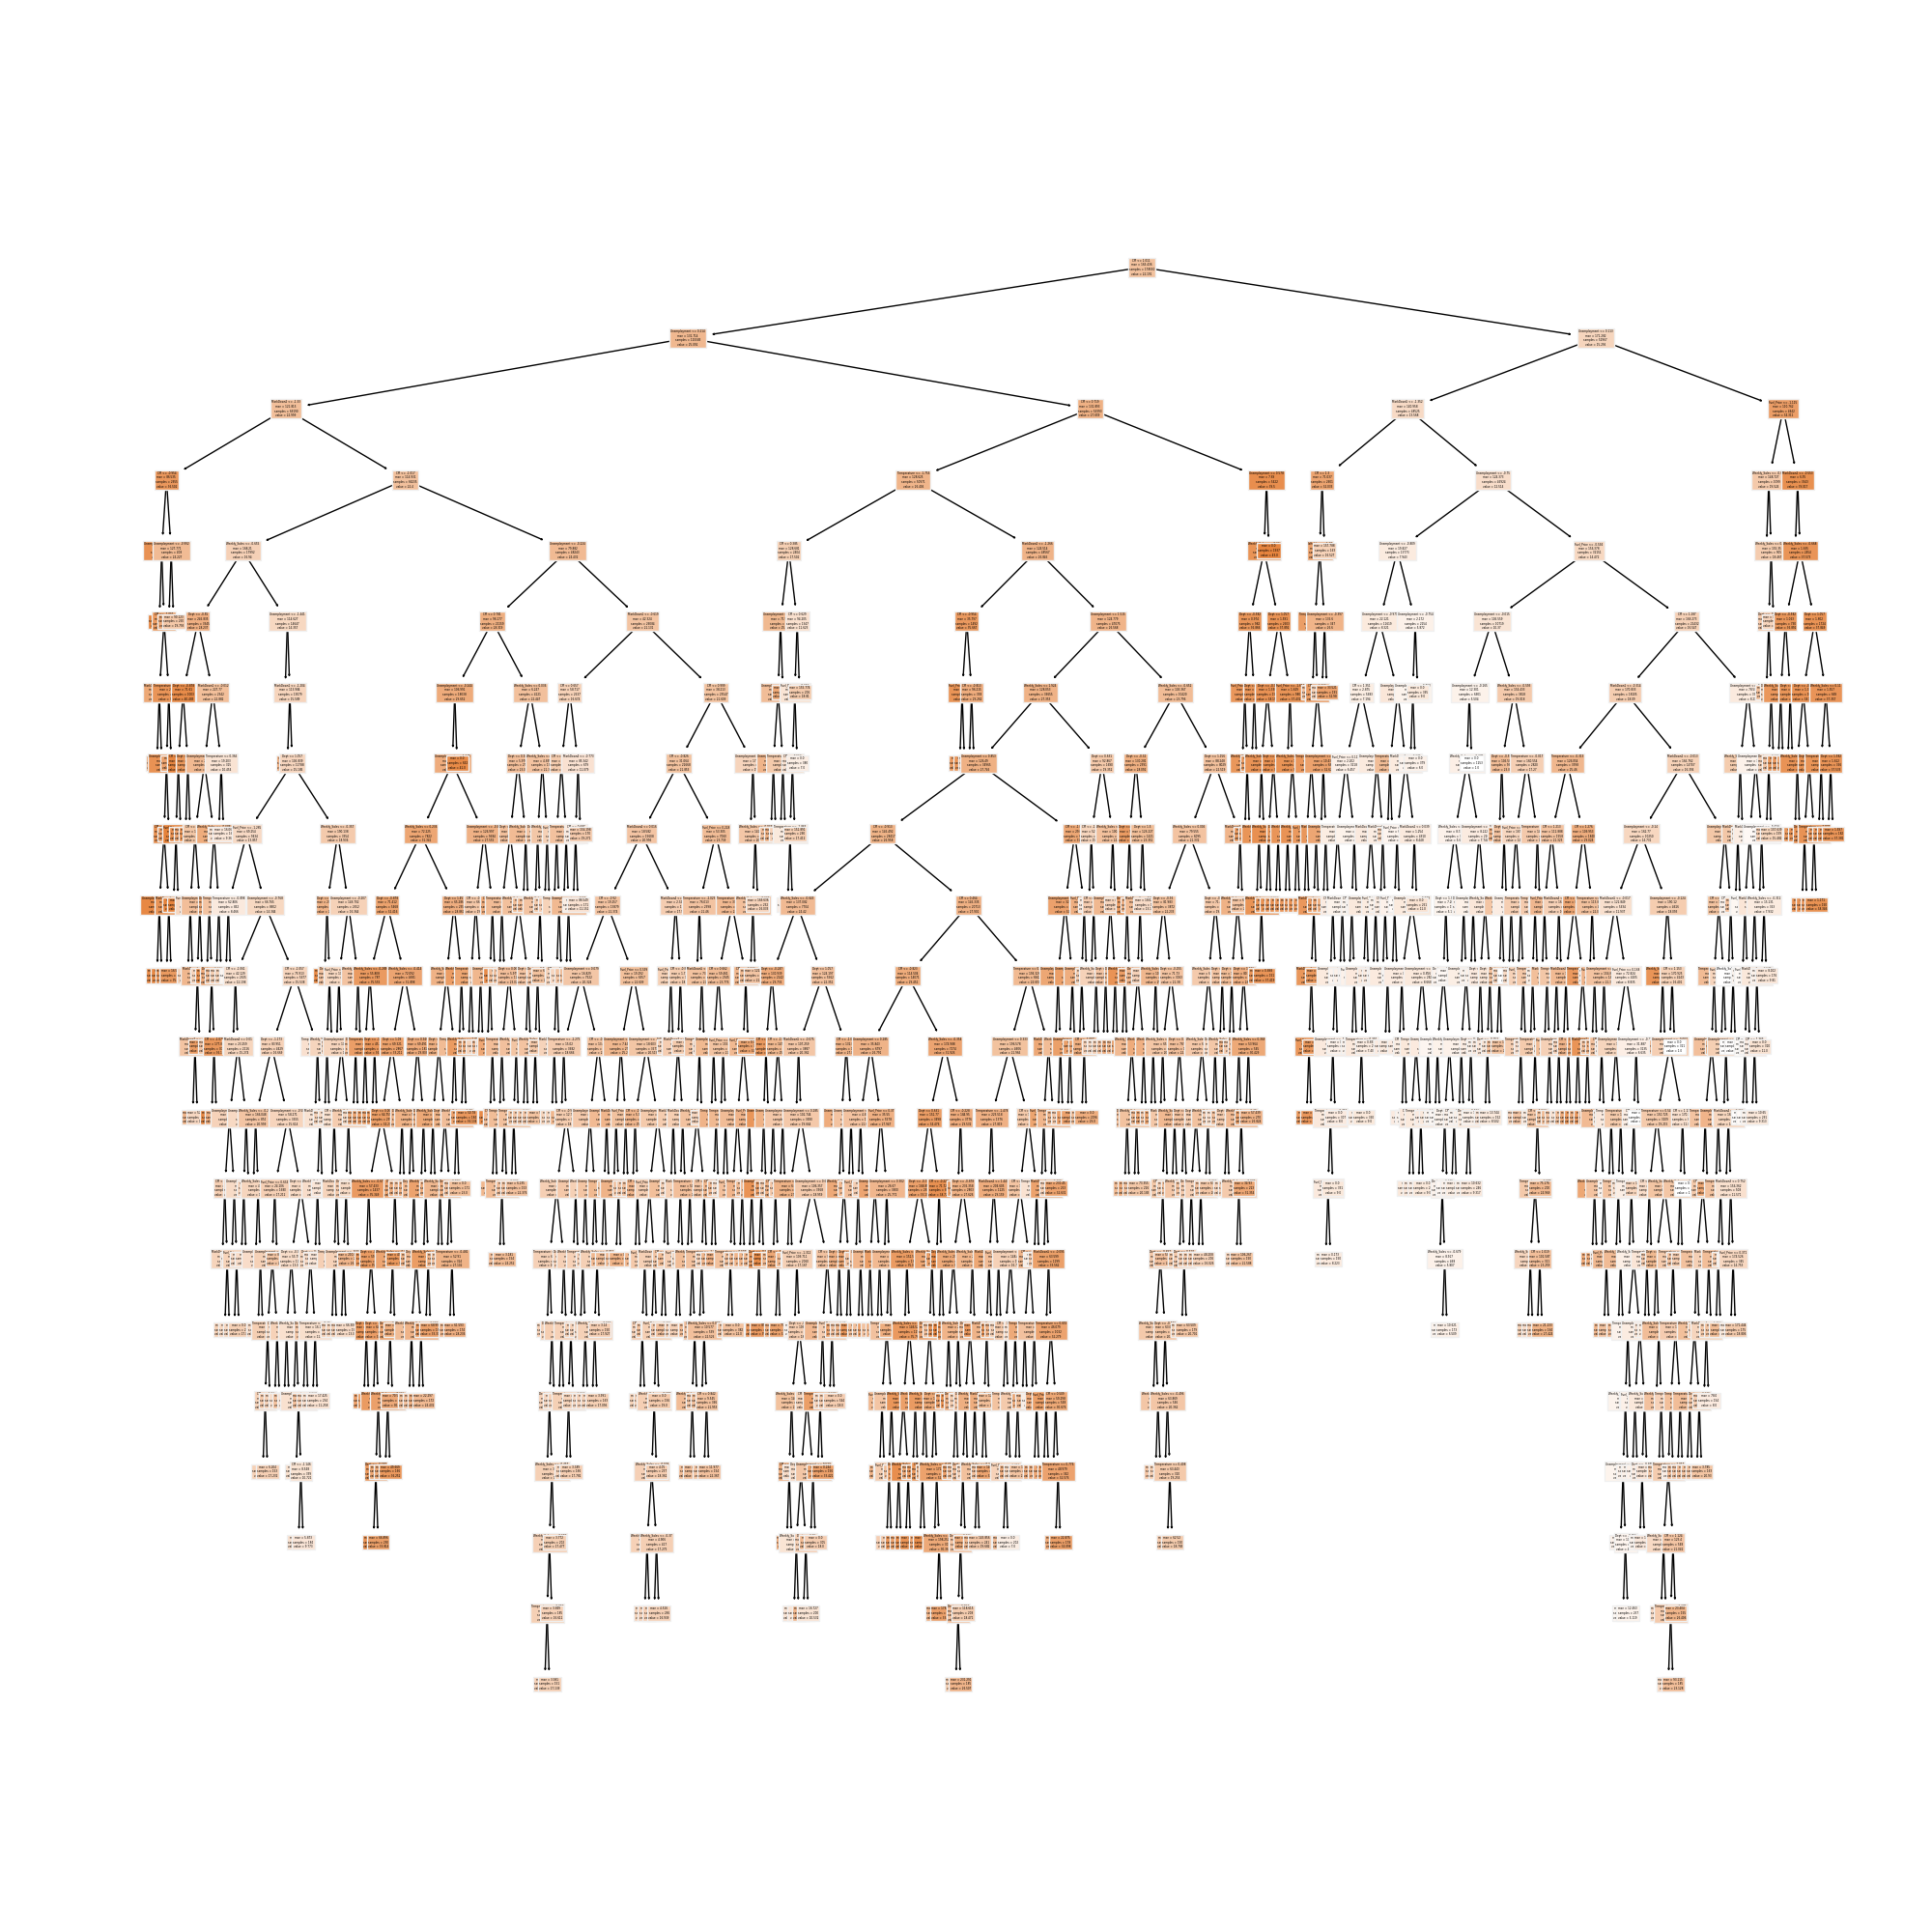

In [61]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=200)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);
fig.savefig('rf_individualtree.png')

### Predicción datos tabla 1 con la configuración mejor

In [62]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(x_pre, y_prediction, test_size=0.33, random_state=0)

In [75]:
clf_pre = RandomForestClassifier(n_estimators=50)
clf_pre.fit(X_train_pre,y_train_pre)

RandomForestClassifier(n_estimators=50)

In [72]:
clf_pre.score(X_test_pre, y_test_pre)

0.11764705882352941

In [73]:
y_pred = clf_pre.predict(X_test_pre)

In [74]:
# Modelo mas optimo
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test_pre, y_pred)*100),'%')

Accuracy: 11.765 %


Al aplicar el modelo random forest, se puede visualizar la misma predicción que el modelo knn.

# 8.- Comparación

Al comprar los dos modelos de algoritmo, se puede visualizar que al utilizar KNN es más próximo en una aceptación, pero random forest al aumentar se aproxima a un valor estandar. Ya que al buscar las diversas combinaciones se puede predecir con mayor probabilidad la predicción de valores. En cambio, KNN al tener que buscar cada K, su algoritmo consume un mayor % de recurso y genera un menor de porcentaje de aceptación en el modelo.
Además cabe de señal que al aplicar los mejores modelos de knn y random forest al df de tabla I, los valores coinciden con la muestra en su predicción.